<a href="https://colab.research.google.com/github/Mintass/INFO213/blob/main/INFO213_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Drexel University
## College of Computing and Informatics
## INFO 213: Data Science Programming II
## Assignment 2
## Due Date: Sunday, April 27, 2024



### A. Assignment Overview
This assignment provides the opportunity for you to practice with the data science in Python.

### B. What to Hand In

Sumbit a completed this Jupyter notebook.

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

### F. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles.

1. Write a good comment for each variable, each method, each control branch, and each loop.
2. Your method comments must mention the purpose of each parameter, and must be grammatically correct.  


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Question 1: Implement Logistic Regression
In this question, you will build a logistic regression model to predict whether a student gets admitted into a university based on historical data. For each training example, you have the applicant's scores on two exams and the admissions decision (1 for positive and 0 for negative). Your task is to build a classication model that estimates an applicant's probability of admission based the scores from those two exams.

The algorithm for training a logistic regression model can be summarized as follows:
- Assume we have $n$ training examples. Each example has $m$ features.
- Given input $\mathbf{x}=\{x_j^{(i)}\}$, $i=1...n, j=1...m$, and labels $\mathbf{y}=\{y^{(i)}\}$, where $y^{(i)}\in[0, 1]$, $i=1...n$.
- Initialize weights $\mathbf{w}=\{w_j\}$, $j=0...m$
- Compute $z^{(i)}=\mathbf{w}^{T}\mathbf{x}^{(i)}=w_0x_0^{(i)}+w_1x_1^{(i)}+...+w_mx_m^{(i)}$
- Compute $\bar{y}^{(i)}=\phi(z^{(i)})=\frac{1}{1+e^{-z^{(i)}}}$ (**Notice here $\bar{y}$ is the real value of the sigmoid function, not the predicted classification label in \{0,1\}.**)
- Calculate the loss: \begin{equation}
J(\mathbf{w}) = -\Sigma_i(y^{(i)} log(\bar{y}^{(i)})+(1-y^{(i)}) log(1-\bar{y}^{(i)}))
\end{equation}
- Update the weights by taking a step in the opposite direction of the gradient, $\nabla J(\mathbf{w})$ of our cost function $J(\mathbf{w})$:
 - $\mathbf{w} := \mathbf{w} + \Delta \mathbf{w}$, where $\Delta \mathbf{w}= - \eta \nabla J(\mathbf{w})$.
 - Update the weight $w_j$ as:
\begin{equation}
\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta \Sigma_i(y^{(i)}-\phi(z^{(i)}))x_j^{(i)}
\end{equation}


Step 1: The training data set is `exams.csv`. Load the training data as a Pandas DataFrame. Visualize the exam1_score and exam2_score in a 2-dimensional plot. Label the data with their admission decisions.

   exam1_score  exam2_score  decision
0    34.623660    78.024693         0
1    30.286711    43.894998         0
2    35.847409    72.902198         0
3    60.182599    86.308552         1
4    79.032736    75.344376         1


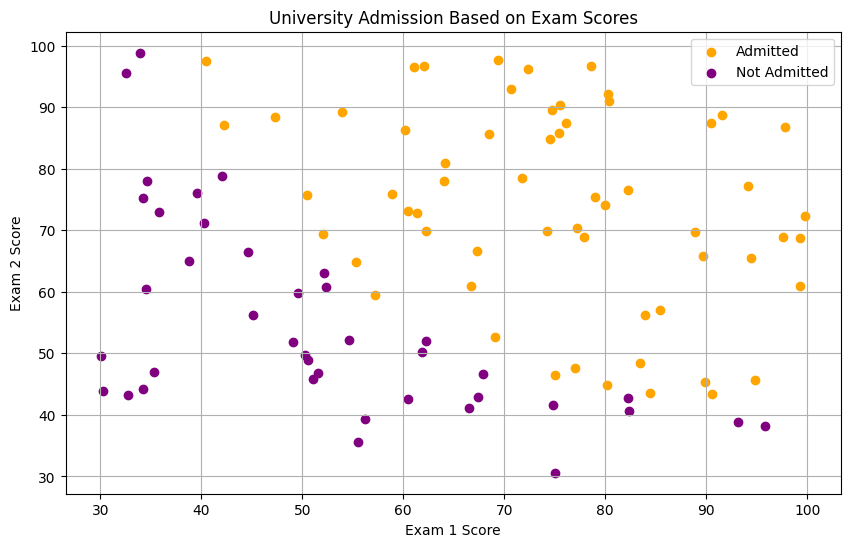

In [110]:
df_train = pd.read_csv("INFO213_Assignment2_Dataset/exams.csv")
print(df_train.head())

plt.figure(figsize=(10, 6))
plt.scatter(df_train[df_train['decision'] == 1]['exam1_score'], df_train[df_train['decision'] == 1]['exam2_score'], color='orange', label='Admitted')
plt.scatter(df_train[df_train['decision'] == 0]['exam1_score'], df_train[df_train['decision'] == 0]['exam2_score'], color='purple', label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('University Admission Based on Exam Scores')
plt.legend()
plt.grid(True)
plt.show()

Step 2: Implement the `sigmoid` function: $sigmoid(z)=\frac{1}{1+e^{-z}}$. Test the function using a few values. For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5. Your code should also work with vectors and matrices.

In [111]:
def sigmoid(z):
    """
    compute the sigmoid activation of the given value
    input: z: given value
    output: sigmoid of the input value
    """
    return 1 / (1 + np.exp(-z))

# test
print("sigmoid(0) =", sigmoid(0))
print("sigmoid(100) =", sigmoid(100))
print("sigmoid(-100) =", sigmoid(-100))

z_vec = np.array([-5, 0, 5])
print("sigmoid([-5, 0, 5]) =", sigmoid(z_vec))

z_mat = np.array([[1, 2], [-1, -2]])
print("sigmoid(matrix):\n", sigmoid(z_mat))

sigmoid(0) = 0.5
sigmoid(100) = 1.0
sigmoid(-100) = 3.7200759760208356e-44
sigmoid([-5, 0, 5]) = [0.00669285 0.5        0.99330715]
sigmoid(matrix):
 [[0.73105858 0.88079708]
 [0.26894142 0.11920292]]


Step 3: Implement the function `computeZ(w, X)`: $\mathbf{z}=\mathbf{X}\mathbf{w}[1:] + {w}_0$, where $\mathbf{X}$ is the input $n\times m$ matrix with $n$ examples and $m$ features, $\mathbf{w}$ is $(m+1)\times 1$ feature vector, and $w_0$ is the bias. The function returns a vector of values. Test the function on the first two rows of the training data `exams.csv` with the weights $\mathbf{w}=[0.5, 1, -1]$. Verify the results are correct.

In [112]:
def computeZ(w, X):
    """
    compute the output z given the input and the weights
    input: X: the nxm input values
           w: the (m+1)x1 weights
    output: nx1 output values
    """
    return np.dot(X, w[1:]) + w[0]

# test
X_test = df_train[['exam1_score', 'exam2_score']].values[:2]
w = np.array([0.5, 1, -1])
z_test = computeZ(w, X_test)

print("X_test:\n", X_test)
print("Weights:", w)
print("Computed z values:", z_test)

X_test:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]]
Weights: [ 0.5  1.  -1. ]
Computed z values: [-42.90103319 -13.10828676]


Step 4: Implement the function `computeLoss(w, X, y)` to compute the total loss, given the weights $\mathbf{w}$, input $\mathbf{X}$, and true label $\mathbf{y}$:
\begin{equation}
J(\mathbf{w}) = -\Sigma_i(y^{(i)} log(\bar{y}^{(i)})+(1-y^{(i)}) log(1-\bar{y}^{(i)}))
\end{equation}
where $\mathbf{X}$ is the input $n\times m$ matrix with $n$ examples and $m$ features, $\mathbf{w}$ is $(m+1)\times 1$ feature vector, and $w_0$ is the bias, $\mathbf{y}$ is a $n\times 1$ vector of true labels. The function returns a single value. Test the function on the first two rows of the training data `exams.csv` with the weights $\mathbf{w}=[0.5, 1, -1]$ and true labels $y=[1, 1]$. Verify the result is correct.

In [113]:
def computeLoss(w, X, y):
    """
    compute the loss of predicting X given the weights and true labels
    input: X: the nxm input values
           w: the (m+1)x1 weights
           y: the nx1 true labels
    output: a single loss value
    """
    epsilon = 1e-15
    z = computeZ(w, X)
    y_pred = sigmoid(z)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    return loss

# test
X_test = df_train[['exam1_score', 'exam2_score']].values[:2]
y_test = np.array([1, 1])
w = np.array([0.5, 1, -1])

loss = computeLoss(w, X_test, y_test)
print("Loss on first two examples:", loss)

Loss on first two examples: 47.6470651790359


Step 5: Implement the function `computeErrors(w, X, y)` to compute the errors of predicting the input, given the weights  𝐰 , input  𝐗 , and true label  𝐲 : $\mathbf{errors} = \mathbf{y} - \bar{\mathbf{y}}$,
where  𝐗  is the input  𝑛×𝑚  matrix with  𝑛  examples and  𝑚  features,  𝐰  is  (𝑚+1)×1  feature vector, and  $w_0$  is the bias,  𝐲  is a  𝑛×1  vector of true labels, $\bar{\mathbf{y}}$ is a $n\times 1$ vector of predicted probabilities. The function returns a $n\times 1$ vector of errors. Test the function on the first two rows of the training data with the weights  𝐰=[0.5,1,−1]  and true labels  𝑦=[1,1]. Verify the results are correct.

In [114]:
def computeErrors(w, X, y):
    """
    compute the errors of predicting X given the weights and true labels
    input: X: the nxm input values
           w: the (m+1)x1 weights
           y: the nx1 true labels
    output: a nx1 vector of errors
    """
    z = computeZ(w, X)
    y_pred = sigmoid(z)
    errors = y - y_pred
    
    return errors

# test
X_test = df_train[['exam1_score', 'exam2_score']].values[:2]
y_test = np.array([1, 1])
w = np.array([0.5, 1, -1])

errors = computeErrors(w, X_test, y_test)
print("Errors on first two examples:", errors)

Errors on first two examples: [1.         0.99999797]


Step 6: Implement the training function `fit(eta, epochs, X, y, random_state=123, verbose=False)` to train a logistic regression model, given a learning rate `eta` and the number of `epochs`. The `fit()` function initializes a weight vector by small random values. The parameter 𝐗  is the input  𝑛×𝑚  matrix with  𝑛  examples and  𝑚  features,  𝐲  is a  𝑛×1  vector of true labels, `random_state` sets a random state value, and `verbose` is a boolean value indicating whether to print out intermediate weights and losses. The function returns a $(m+1)\times 1$ vector of weights and a $epochs\times 1$ vector of losses. Test the function on the first two rows of the training data with the true labels  𝑦=[1,1], eta=0.01, epochs=5. Verify the results are correct.

In [115]:
import random
import numpy as np

def fit(eta, epochs, X, y, random_state=1234, verbose=False):
    """
    fit a logistic regression model by updating the given weights
    input: eta: learning rate
           epochs: the number of learning iterations
           X: the nxm input values
           y: the nx1 true labels
           random_state: set up a random state for reproducible results
           verbose: a boolean value; if True, print out intermediate values
    output: w: the (m+1)x1 weights after logistic regression learning
            losses: the loss in each epoch
    """

    rgen = np.random.RandomState(random_state)
    w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

    loss = computeLoss(w, X, y)

    if verbose:
        print("The initial weights are: {}\nThe initial loss is: {}".format(w, loss))

    losses = []
    for epoch in range(1, epochs + 1):
        errors = computeErrors(w, X, y)
        w[0] += eta * errors.sum()
        w[1:] += eta * X.T.dot(errors)

        curr_loss = computeLoss(w, X, y)
        losses.append(curr_loss)
        if verbose:
            print(f"Epoch {epoch} — weights: {w}, loss: {curr_loss:.6f}")

    return w, losses

# test
X_test = df_train[['exam1_score','exam2_score']].values[:2]
y_test = np.array([1, 1])
# Train for 5 epochs
w_final, losses = fit(
    eta = 0.01,
    epochs = 5,
    X = X_test,
    y = y_test,
    random_state = 1234,
    verbose = True
)

print("\nFinal learned weights:", w_final)
print("Loss history:", losses)

The initial weights are: [ 0.00471435 -0.01190976  0.01432707]
The initial loss is: 0.9657869000867435
Epoch 1 — weights: [0.01233182 0.23309079 0.46117038], loss: 0.000000
Epoch 2 — weights: [0.01233182 0.23309079 0.46117038], loss: 0.000000
Epoch 3 — weights: [0.01233182 0.23309079 0.46117038], loss: 0.000000
Epoch 4 — weights: [0.01233182 0.23309079 0.46117038], loss: 0.000000
Epoch 5 — weights: [0.01233182 0.23309079 0.46117038], loss: 0.000000

Final learned weights: [0.01233182 0.23309079 0.46117038]
Loss history: [1.372790769949947e-12, 1.372790769949947e-12, 1.372790769949947e-12, 1.372790769949947e-12, 1.372790769949947e-12]


Step 7: Implement the function `predict_proba(w, X)` to predit the probability of classifying the input as label 1. The parameter $\mathbf{w}$ is a $(m+1)\times 1$ vector of weights, $w_0$ is the bias, 𝐗 is the input 𝑛×𝑚 matrix with 𝑛 examples and 𝑚 features. The function returns a $n\times 1$ vector of probabilities. Test the function on the first two rows of the training data and $w=[0.5, 1, -1]$. **What do the results tell you?**

In [116]:
def predict_proba(w, X):
    """
    compute the probabilities of predicting X as class 1
    input: X: the nxm input values
           w: the (m+1)x1 weights
    output: a nx1 vector of probabilities
    """
    z = computeZ(w, X)
    y_hat = sigmoid(z)

    return y_hat

X_test = df_train[['exam1_score','exam2_score']].values[:2]
w = np.array([0.5, 1, -1])

probas = predict_proba(w, X_test)
print("Predicted probabilities for class=1:", probas)

Predicted probabilities for class=1: [2.33516739e-19 2.02834821e-06]


Both probabilities are very close to 0, which means the model is essentially certain these two students would not be admitted under the current parameter setting.

Step 8: Implement the function `predict(w, X)` to predit the input as class 1 or 0. The parameter $\mathbf{w}$ is a $(m+1)\times 1$ vector of weights, $w_0$ is the bias, 𝐗 is the input 𝑛×𝑚 matrix with 𝑛 examples and 𝑚 features. The function returns a $n\times 1$ vector of 1 or 0. Test the function on the first two rows of the training data and $w=[0.5, 1, -1]$. **What do the results tell you?**

In [117]:
def predict(w, X):
    """
    compute the classes of the input X
    input: X: the nxm input values
           w: the (m+1)x1 weights
    output: a nx1 vector of 0 or 1
    """
    probas = predict_proba(w, X)
    
    return np.where(probas >= 0.5, 1, 0)

X_test = df_train[['exam1_score','exam2_score']].values[:2]
w = np.array([0.5, 1, -1])

preds = predict(w, X_test)
print("Predicted classes for class=1:", preds)

Predicted classes for class=1: [0 0]


The model predicts that both students will not be admitted under the current parameter setting.

Step 9: Train the logistic regression model on the training data using appropriate learning rate and number of epochs so that the algorithm coverges. My suggesetion is `eta=0.05` and `epochs=200`. Assign the final weights to `weights` and losses to `losses`. Prior to training the model, it's essential to standardize the input X. Consider exploring the potential outcomes when X isn't standardized. Using the given function `plot_decision_regions(X, y, weights, resolution)` to plot the decision regions of the logistic regression. **Explain the results.**

In [118]:
from sklearn.preprocessing import StandardScaler

X = df_train[['exam1_score', 'exam2_score']].values
y = df_train['decision'].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [119]:
weights, losses = fit(0.05, 200, X_std, y, verbose=False)

In [120]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, weights, resolution=0.02):
    """
    plot the decisoin regions of the logistic regression represented by weights.
    Input: X: nxm input values
           y: nx1 true labels
           weights: learned logistic regression model
           resolution: resolution on the grid
    """

    # setup marker generator and color map
    markers = ('s', 'x')
    colors = ('lightgreen', 'cyan', 'purple', 'orange')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = predict(weights, np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    #plt.scatter(xx1, xx2, c=Z, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx+2],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20412\2011969701.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


Text(0, 0.5, 'Exam2 Score [standardized]')

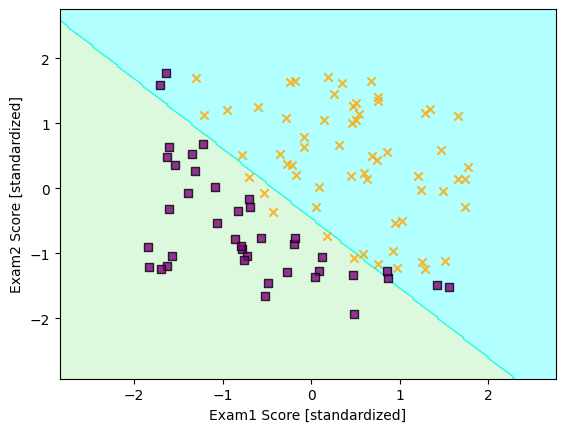

In [121]:
plot_decision_regions(X_std, y, weights)
plt.xlabel("Exam1 Score [standardized]")
plt.ylabel("Exam2 Score [standardized]")

Almost every purple point lies in the green region and every yellow cross in the cyan region, meaning the logistic classifier has successfully separated the two groups. A couple of points near the line may fall on the wrong side—those are the only misclassifications.

Step 10: Predict the admission probability for a student whose scores are: exam1_score = 45 and exam2_score = 85. (The probability is 0.776). Again, standardize the values before calling the `predict_proba()` function.

In [122]:
new_scores = np.array([[45, 85]])
new_scores_std = scaler.transform(new_scores)

prob = predict_proba(weights, new_scores_std)
print(f"Predicted admission probability: {prob[0]:.3f}")

Predicted admission probability: 0.776


Step 11: Check the convergence of the training process by plotting the `losses`. You should see the losses decrease and flatten out after a certain number of epochs. **What does the plot tell you?**

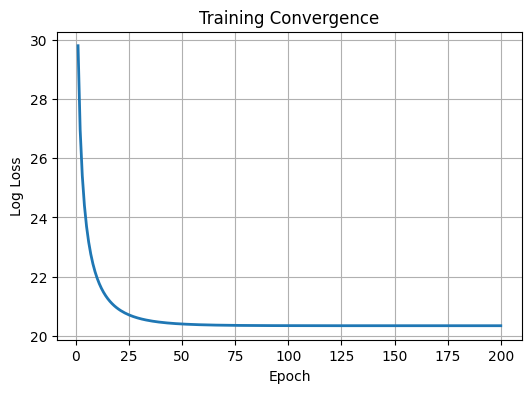

In [123]:
plt.figure(figsize=(6,4))
plt.plot(range(1, len(losses)+1), losses, linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Training Convergence')
plt.grid(True)
plt.show()

- Steep drop in the first ~20–30 epochs, as the model quickly finds a direction that reduces error.
- After that, the loss levels off around ~30, indicating the model reached the best fit given the data and learning rate.
- Beyond ~50 epochs, there’s no meaningful improvement, so we could safely stop training early without losing performance.

Step 12: Compute the classification accuracy of the final logistic regression model on the training data. (My accurary is 89%.)

In [124]:
y_pred = predict(weights, X_std)
accuracy = np.mean(y_pred == y)

print(f"Training accuracy: {accuracy * 100:.2f}%")

Training accuracy: 89.00%


# Question 2: Add Regularization to Logistic Regression
In this question 2, you will build a regularized logistic regression model to predict whether microchips from a fabrication plant passes quality assurance (QA). Each training example has the results of two different tests. From these two tests, each example is labeled whether the microchip is accepted (1) or rejected (0). Your task is to build a regularized classication model that estimates the probability of accepting a microhip based the results of those two tests.

Recall that the regularized logistic regression algorithm addes a regularization term to the loss function. As a result, the weight update rules have extra terms. The differences are summarized below:

The algorithm for training a logistic regression model can be summarized as follows:
- Assume we have $n$ training examples. Each example has $m$ features.
- Given input $\mathbf{x}=\{x_j^{(i)}\}$, $i=1...n, j=1...m$, and labels $\mathbf{y}=\{y^{(i)}\}$, where $y^{(i)}\in[0, 1]$, $i=1...n$.
- Initialize weights $\mathbf{w}=\{w_j\}$, $j=0...m$
- Compute $z^{(i)}=\mathbf{w}^{T}\mathbf{x}^{(i)}=w_0x_0^{(i)}+w_1x_1^{(i)}+...+w_mx_m^{(i)}$
- Compute $\bar{y}^{(i)}=\phi(z^{(i)})=\frac{1}{1+e^{-z^{(i)}}}$
- Calculate the loss (regularized): \begin{equation}
J(\mathbf{w}) = -\Sigma_i(y^{(i)} log(\bar{y}^{(i)})+(1-y^{(i)}) log(1-\bar{y}^{(i)}))+ \frac{\lambda}{2}\Sigma_j w_j^2, j=1...m
\end{equation}
- Update the weights by taking a step in the opposite direction of the gradient, $\nabla J(\mathbf{w})$ of our cost function $J(\mathbf{w})$:
 - $\mathbf{w} := \mathbf{w} + \Delta \mathbf{w}$, where $\Delta \mathbf{w}= - \eta \nabla J(\mathbf{w})$, specifically,
 \begin{equation}
\nabla J_j=\frac{\partial J}{\partial w_j} = - \Sigma_i(y^{(i)}-\phi(z^{(i)}))x_j^{(i)} + \lambda w_j
\end{equation}
 - Update $w_0$ without regularization:
\begin{equation}
\Delta w_0 = - \eta \frac{\partial J}{\partial w_0} = \eta \Sigma_i(y^{(i)}-\phi(z^{(i)}))x_0^{(i)}
\end{equation}
 - Update the rest of $w_j$ with regularization:
\begin{equation}
\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta (\Sigma_i(y^{(i)}-\phi(z^{(i)}))x_j^{(i)} - \lambda w_j)
\end{equation}

Step 1: The training data set is `tests.csv`. Load the training data as a Pandas DataFrame. Visualize the results of test1 and test2 in a 2-dimensional plot. Label the data with their acceptance decisions. You will see that the dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

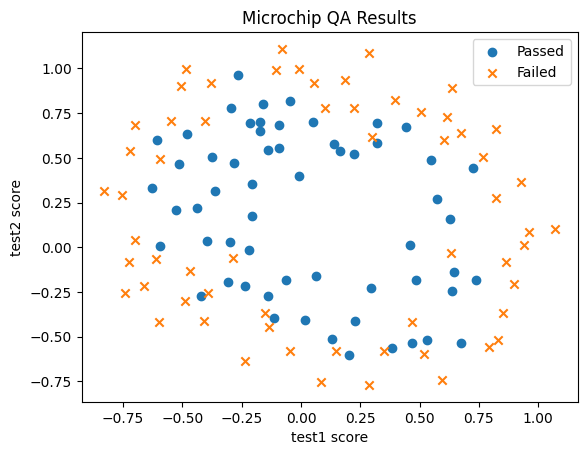

In [125]:
df_test = pd.read_csv("INFO213_Assignment2_Dataset/tests.csv")

pos = df_test['passed'] == 1
neg = df_test['passed'] == 0

plt.figure()
plt.scatter(df_test.loc[pos, 'test1'], df_test.loc[pos, 'test2'], marker='o', label='Passed')
plt.scatter(df_test.loc[neg, 'test1'], df_test.loc[neg, 'test2'], marker='x', label='Failed')
plt.xlabel('test1 score')
plt.ylabel('test2 score')
plt.legend()
plt.title('Microchip QA Results')
plt.show()

Step 2: Implement the `sigmoid` function: $sigmoid(z)=\frac{1}{1+e^{-z}}$. The function should be the same as that in Question 1.

In [126]:
def sigmoid(z):
    """
    compute the sigmoid activation of the given value
    input: z: given value
    output: sigmoid of the input value
    """
    return 1 / (1 + np.exp(-z))

Step 3: Implement the function `computeZ(w, X)`: $\mathbf{z}=\mathbf{X}\mathbf{w}[1:] + {w}_0$, where $\mathbf{X}$ is the input $n\times m$ matrix with $n$ examples and $m$ features, $\mathbf{w}$ is $(m+1)\times 1$ feature vector, and $w_0$ is the bias. This function sould be the same as in Question 1.

In [127]:
def computeZ(w, X):
    """
    compute the output z given the input and the weights
    input: X: the nxm input values
           w: the (m+1)x1 weights
    output: nx1 output values
    """
    return np.dot(X, w[1:]) + w[0]

Step 4: Implement the function `computeLoss_reg(w, X, y)` to compute the **regularized** total loss, given the weights $\mathbf{w}$, input $\mathbf{X}$, and true label $\mathbf{y}$:
\begin{equation}
J(\mathbf{w}) = -\Sigma_i(y^{(i)} log(\bar{y}^{(i)})+(1-y^{(i)}) log(1-\bar{y}^{(i)}))+ \frac{\lambda}{2}\Sigma_j w_j^2, j=1...m
\end{equation}
where $\mathbf{X}$ is the input $n\times m$ matrix with $n$ examples and $m$ features, $\mathbf{w}$ is $(m+1)\times 1$ feature vector, and $w_0$ is the bias, $\mathbf{y}$ is a $n\times 1$ vector of true labels. The function returns a single value. Test the function on the first two rows of the training data with the weights $\mathbf{w}=[0.5, 1, -1]$ and true labels $y=[1, 1]$. Verify the result is correct.

In [128]:
def computeLoss_reg(w, X, y, lmd):
    """
    compute the loss of predicting X given the weights and true labels
    input: X: the nxm input values
           w: the (m+1)x1 weights
           y: the nx1 true labels
           lmd: regularization parameter
    output: a single regularized loss value
    """
    z = computeZ(w, X)
    y_pred = sigmoid(z)
    
    loss = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    reg = (lmd / 2) * np.sum(w[1:] ** 2)
    
    return loss + reg

# test
X_test = df_test[['test1', 'test2']].values[:2]
y_test = np.array([1,1])
w = np.array([0.5, 1, -1])
lmd = 1

loss_reg = computeLoss_reg(w, X_test, y_test, lmd)
print("Loss on first two examples:", loss_reg)

Loss on first two examples: 2.611635801379267


Step 5: Implement the function `computeErrors(w, X, y)` to compute the errors of predicting the input, given the weights  𝐰 , input  𝐗 , and true label  𝐲 : $\mathbf{errors} = \mathbf{y} - \bar{\mathbf{y}}$,
where  𝐗  is the input  𝑛×𝑚  matrix with  𝑛  examples and  𝑚  features,  𝐰  is  (𝑚+1)×1  feature vector, and  $w_0$  is the bias,  𝐲  is a  𝑛×1  vector of true labels, $\bar{\mathbf{y}}$ is a $n\times 1$ vector of predicted probabilities. This function should be the same as in Question 1.

In [129]:
def computeErrors(w, X, y):
    """
    compute the errors of predicting X given the weights and true labels
    input: X: the nxm input values
           w: the (m+1)x1 weights
           y: the nx1 true labels
    output: a nx1 vector of errors
    """
    z = computeZ(w, X)
    y_pred = sigmoid(z)
    errors = y - y_pred

    return errors

# test
X_test = df_test[['test1', 'test2']].values[:2]
y_test = np.array([1, 1])
w = np.array([0.5, 1, -1])

errors = computeErrors(w, X_test, y_test)
print("Errors on first two examples:", errors)

Errors on first two examples: [0.53700546 0.56897784]


Step 6: Implement the training function `fit_reg(eta, epochs, X, y, lmd, random_state=123, verbose=False)` to train a **regularized** logistic regression model, given a learning rate `eta`, the number of `epochs`, and the regularization parameter `lmd`. The `fit_reg()` function initializes a weight vector by small random values. The parameter 𝐗  is the input  𝑛×𝑚  matrix with  𝑛  examples and  𝑚  features,  𝐲  is a  𝑛×1  vector of true labels, `random_state` sets a random state value, and `verbose` is a boolean value indicating whether to print out intermediate weights and losses. The function returns a $(m+1)\times 1$ vector of weights and a $epochs\times 1$ vector of losses. Test the function on the first two rows of the training data with the true labels  𝑦=[1,1], eta=0.01, epochs=5. Verify the results are correct.

In [130]:
import random
import numpy as np

def fit_reg(eta, epochs, X, y, lmd, random_state=1234, verbose=False):
    """
    fit a logistic regression model by updating the given weights
    input: eta: learning rate
           epochs: the number of learning iterations
           X: the nxm input values
           y: the nx1 true labels
           lmd: regularization parameter
           random_state: set up a random state for reproducible results
           verbose: a boolean value; if True, print out intermediate values
    output: w: the (m+1)x1 weights after logistic regression learning
            losses: the loss in each epoch
    """

    rgen = np.random.RandomState(random_state)
    w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

    loss = computeLoss_reg(w, X, y, lmd)

    if verbose:
        print("The initial weights are: {}\nThe initial loss is: {}".format(w, loss))

    losses = []
    for epoch in range(epochs):
        errors = computeErrors(w, X, y)
        w[0] += eta * np.sum(errors)
        
        grad = X.T.dot(errors) - lmd * w[1:]
        w[1:] += eta * grad
        
        curr_loss = computeLoss_reg(w, X, y, lmd)
        losses.append(curr_loss)
        
        if verbose:
            print(f"Epoch {epoch} — weights: {w}, loss: {curr_loss:.6f}")

    return w, losses

# test
X_test = df_test[['test1', 'test2']].values[:2]
y_test = np.array([1, 1])
w = np.array([0.5, 1, -1])
lmd = 1

w_final, losses = fit_reg(0.01, 5, X_test, y_test, lmd, 1234, True)
print("\nFinal learned weights:", w_final)
print("Loss history:", losses)

The initial weights are: [ 0.00471435 -0.01190976  0.01432707]
The initial loss is: 1.3716441596722035
Epoch 0 — weights: [ 0.01463996 -0.01199622  0.02105483], loss: 1.357341
Epoch 1 — weights: [ 0.02449265 -0.01208032  0.02766483], loss: 1.343338
Epoch 2 — weights: [ 0.03427321 -0.0121621   0.0341588 ], loss: 1.329626
Epoch 3 — weights: [ 0.04398244 -0.0122416   0.04053845], loss: 1.316199
Epoch 4 — weights: [ 0.0536211  -0.01231886  0.04680545], loss: 1.303048

Final learned weights: [ 0.0536211  -0.01231886  0.04680545]
Loss history: [1.3573411853745625, 1.3433376043794634, 1.3296258467677773, 1.3161985263766196, 1.303048437542515]


Step 7: Implement the function `predict_proba(w, X)` to predit the probability of classifying the input as label 1. The parameter $\mathbf{w}$ is a $(m+1)\times 1$ vector of weights, $w_0$ is the bias, 𝐗 is the input 𝑛×𝑚 matrix with 𝑛 examples and 𝑚 features. This function is the same as in Question 1.

In [131]:
def predict_proba(w, X):
    """
    compute the probabilities of predicting X as class 1
    input: X: the nxm input values
           w: the (m+1)x1 weights
    output: a nx1 vector of probabilities
    """
    z = computeZ(w, X)
    y_hat = sigmoid(z)

    return y_hat

# test
X_test = df_test[['test1', 'test2']].values[:2]
w = np.array([0.5, 1, -1])

probas = predict_proba(w, X_test)
print("Predicted probabilities for class=1:", probas)

Predicted probabilities for class=1: [0.46299454 0.43102216]


Step 8: Implement the function `predict(w, X)` to predit the input as class 1 or 0. The parameter $\mathbf{w}$ is a $(m+1)\times 1$ vector of weights, $w_0$ is the bias, 𝐗 is the input 𝑛×𝑚 matrix with 𝑛 examples and 𝑚 features. This function is the same as in Question 1.

In [132]:
def predict(w, X):
    """
    compute the classes of the input X
    input: X: the nxm input values
           w: the (m+1)x1 weights
    output: a nx1 vector of 0 or 1
    """
    probas = predict_proba(w, X)
    
    return np.where(probas >= 0.5, 1, 0)

# test
X_test = df_test[['test1', 'test2']].values[:2]
w = np.array([0.5, 1, -1])

preds = predict(w, X_test)
print("Predicted classes for class=1:", preds)

Predicted classes for class=1: [0 0]


Step 9: One way to create a non-linear decision boundary from linear model is to create polynomial features from each data point. We will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power. As a result of this mapping, the vector of two features (the results of the
two tests) will be transformed into a 27-dimensional vector:
\begin{align} \mathbf{x}=\begin{bmatrix}
x_1\\
x_2 \\
x_1^2 \\
x_1x_2\\
x_2^2 \\
x_1^3 \\
x_1x_2^2 \\
x_1^2 x_2 \\
x_2^3 \\
... \\
x_1^6 \\
... \\
x_2^6
\end{bmatrix}
\end{align}

The combinations of powers for $x_1$ and $x_2$ are listed below. You can verify that the total number of terms is 27: \\
1 1 \\
2 11 2 \\
3 21 12 3 \\
4 31 22 13 4 \\
5 41 32 23 14 5 \\
6 51 42 33 24 15 6 \\

A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear non-linear when drawn in our 2-dimensional plot as shown below:
<img src="https://i.imgur.com/hDa7VE1.png" width=800>

While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. That is why we add a regularization term to the loss function.

At this step, you are asked to implement the function `expand_polynomials(X)` to generate a new feature matrix of all the polynomial combinations of the input `m` features. Each polynomial has less or equal to degree 6. If $m=2$, the new matrix will have 27 new features. You can use the scikit-learn class `PolynomialFeatures` for the implementation.



In [133]:
from sklearn.preprocessing import PolynomialFeatures

def expand_polynomials(X):
    """
    Expand the input X with m features to a
    feature matrix consisting of all polynomial combinations of the
    m features with degree less than or equal to 6.
    Input: X: a nxm input matrix
    Output: a new feature matrix of all polynomial combinations of
            the m features with degree less than or equal to 6
    """
    poly = PolynomialFeatures(degree=6, include_bias=False)
    polynomials = poly.fit_transform(X)

    return polynomials

Step 10: Train the regularized logistic regression model on the training data using appropriate learning rate, number of epochs, and regularization parameter so that the algorithm coverges. My suggesetion is `eta=0.01`, `epochs=200`, and `lmd=1`. Assign the final weights to `weights_reg` and losses to `losses_reg`. Prior to training the model, it's essential to standardize the input X. You need first to generated polynomial features, and then standarized all the new features. Using the given function `plot_decision_regions_reg(X, y, weights)` to plot the decision regions of the regularized logistic regression. **Explain the results.**

In [134]:
X1 = df_test[['test1', 'test2']].values
y1 = df_test['passed'].values

X1_poly = expand_polynomials(X1)
scaler = StandardScaler()
X1_poly_std = scaler.fit_transform(X1_poly)

In [135]:
weights_reg, losses_reg = fit_reg(0.01, 200, X1_poly_std, y1, lmd=1, random_state=1234, verbose=False)

In [136]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

def plot_decision_regions_reg(X, y, weights):
    """
    plot the decisoin regions of the logistic regression represented by weights.
    Input: X: nxm input values
           y: nx1 true labels
           weights: learned logistic regression model
           resolution: resolution on the grid
    """

    # setup marker generator and color map
    markers = ('s', 'x')
    colors = ('lightgreen', 'cyan', 'purple', 'orange')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    # Creating a grid for plotting the polynomial line
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                           np.linspace(x2_min, x2_max, 200))

    xx_poly = expand_polynomials(np.array([xx1.ravel(), xx2.ravel()]).T)

    ss = StandardScaler()
    ss.fit(xx_poly)
    xx_poly_std = ss.transform(xx_poly)

    Z = predict(weights, xx_poly_std)

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx_poly_std[:, 0].reshape(xx1.shape), xx_poly_std[:, 1].reshape(xx1.shape),
                 Z, alpha=0.3, cmap=cmap)

    plt.xlim(xx_poly_std[:, 0].min(), xx_poly_std[:, 0].max())
    plt.ylim(xx_poly_std[:, 1].min(), xx_poly_std[:, 1].max())

    sc = StandardScaler()
    sc.fit(X)
    X_std = sc.transform(X)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X_std[y == cl, 0],
                    y=X_std[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx+2],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20412\1314799048.py:49: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X_std[y == cl, 0],


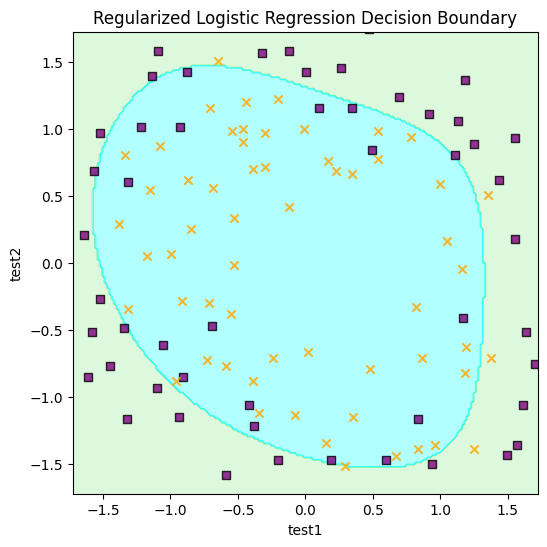

In [137]:
plt.figure(figsize=(6,6))
plot_decision_regions_reg(X1, y1, weights_reg)
plt.title("Regularized Logistic Regression Decision Boundary")
plt.xlabel("test1")
plt.ylabel("test2")
plt.show()

Almost all purple squares lie inside the cyan region (true positives), and most orange crosses lie outside. A handful of points may still be misclassified near the edge, but this is a trade‑off between fitting the training set perfectly and keeping the model generalizable.

Step 11: Predict the passing probability for a microchip whose test scores are: test1 = 0.045 and test2 = 0.085. (The probability is 0.96). Again, expand the input and standardize the values before calling the `predict_proba()` function.

In [138]:
X_new = np.array([[0.045, 0.085]])
X_new_poly = expand_polynomials(X_new)
X_new_poly_std = scaler.transform(X_new_poly)

prob = predict_proba(weights_reg, X_new_poly_std)
print(f"Predicted passing probability: {prob[0]:.3f}")

Predicted passing probability: 0.945


Step 12: Check the convergence of the training process by plotting the `losses`. You should see the losses decrease and flatten out after a certain number of epochs. **What does the plot tell you?**

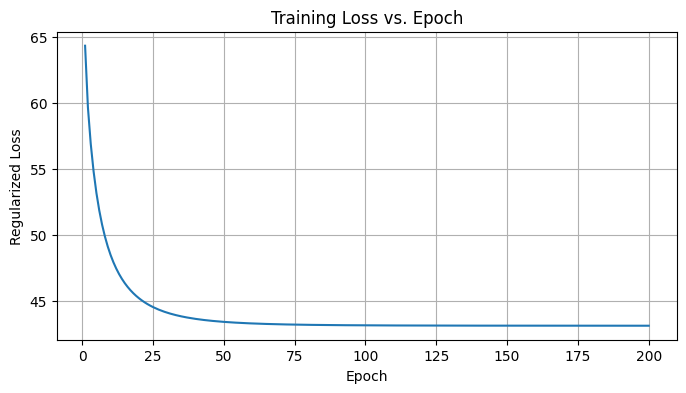

In [139]:
epochs = len(losses_reg)

plt.figure(figsize=(8,4))
plt.plot(range(1, epochs+1), losses_reg)
plt.xlabel('Epoch')
plt.ylabel('Regularized Loss')
plt.title('Training Loss vs. Epoch')
plt.grid(True)
plt.show()

- In the first ~20 epochs, the loss plunges from around 64 down to the mid‑40s. That’s the model quickly learning the big, low‑order structure in the data.

- After about epoch 50 the curve flattens out and by epoch 100 it’s nearly horizontal, settling around ~43. This subsequent plateau mean the model essentially converged, the weights aren’t changing enough to drive the loss any lower.

- The smooth decline tells the the learning rate isn’t too large, and regularization is keeping the model from over‑reacting to individual examples.

Step 13: Compute the classification accuracy of the final logistic regression model on the training data. (My accurary is 82%.)

In [140]:
y_pred = predict(weights_reg, X1_poly_std)
accuracy = np.mean(y_pred == y1)

print(f"Training accuracy: {accuracy * 100:.2f}%")

Training accuracy: 83.05%


Step 14: Try out different regularization
parameters for the dataset to understand how regularization prevents overfitting. Train models using following regularization parameters and draw the decision bounaries:
- overfitting: `lmd=0`
- underfitting: `lmd=100`

**Explain the results.**

In [141]:
weights_reg, losses_reg = fit_reg(0.01, 200, X1_poly_std, y1, lmd=0, verbose=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20412\1314799048.py:49: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X_std[y == cl, 0],


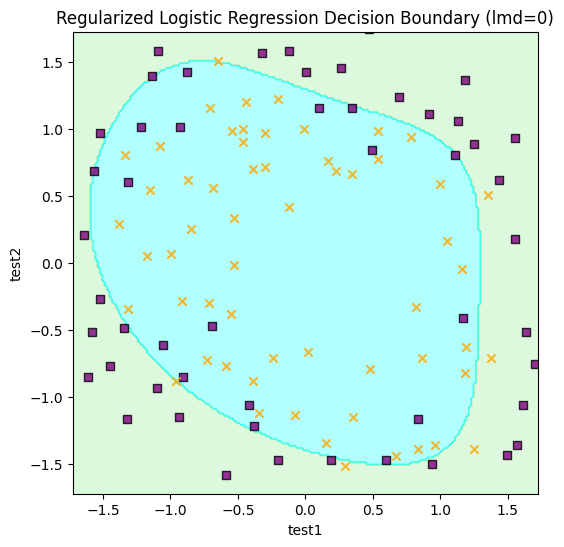

In [142]:
plt.figure(figsize=(6,6))
plot_decision_regions_reg(X1, y1, weights_reg)
plt.title("Regularized Logistic Regression Decision Boundary (lmd=0)")
plt.xlabel("test1")
plt.ylabel("test2")
plt.show()

The boundary is extremely contorted, wrapping tightly around each purple square and orange cross. The model is trying to perfectly classify every training point, but it will also fitting noise. Such a jagged decision surface will generalize poorly to new chips.

In [143]:
weights_reg, losses_reg = fit_reg(0.01, 200, X1_poly_std, y1, lmd=100, verbose=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20412\1314799048.py:49: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X_std[y == cl, 0],


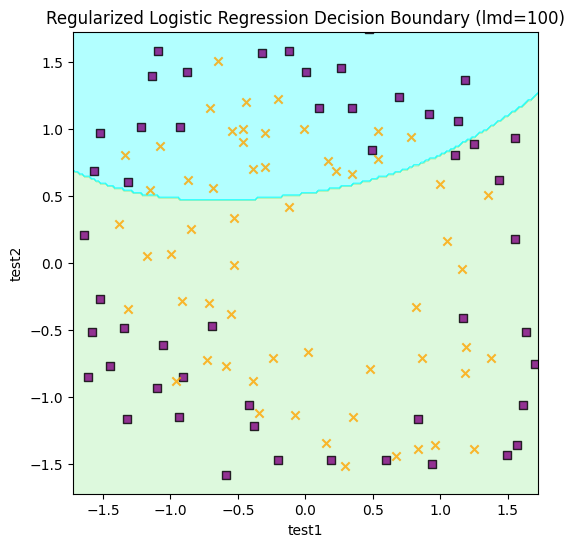

In [144]:
plt.figure(figsize=(6,6))
plot_decision_regions_reg(X1, y1, weights_reg)
plt.title("Regularized Logistic Regression Decision Boundary (lmd=100)")
plt.xlabel("test1")
plt.ylabel("test2")
plt.show()

The boundary becomes almost a straight line. In effect, the model are forced back toward a simple linear classifier. It misses most of the true “pass” cluster in the center, training accuracy plummets because the model is too rigid to capture the circular pattern.